In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Keerthana\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [31]:
hollywood_movies = pd.read_csv("moviedata.csv")

In [32]:
hollywood_movies.head()

,Year,exclude,Film,Lead Studio,Critic Rating,Audience Rating,Story,Genre,Opening Weekend Theaters,Opening Weekend per Cinema,Domestic Gross,Foreign Gross,Worldwide Gross,Budget,Profitability,Opening Weekend Revenue,Oscar
0,2011,NaN,Average,NaN,52.84,61.42,NaN,NaN,2810.31,8764.92,61.33,93.53,144.86,52.25,3.4200,20.14,NaN
1,2011,NaN,The Tree Of Life,Independant,84.00,61.00,Discovery,Drama,4.00,93230.00,13.30,41.00,54.30,32.00,1.6970,0.37,NaN
2,2011,NaN,Midnight in Paris,Sony,93.00,84.00,Love,Romance,944.00,61777.00,56.18,83.00,139.18,17.00,8.1869,5.83,NaN
3,2011,NaN,Harry Potter and the Deathly Hallows Part 2,Warner Bros,96.00,92.00,Rivalry,Fantasy,4375.00,38672.00,381.01,947.10,1328.11,125.00,10.6249,169.19,NaN
4,2011,NaN,Twilight: Breaking Dawn,Independant,26.00,68.00,Love,Romance,4061.00,34012.00,260.80,374.00,634.80,110.00,5.7709,138.12,NaN


In [33]:
# the exclude column seems to have a lot of null values, checking the distribution

hollywood_movies["exclude"].value_counts()

Series([], Name: exclude, dtype: int64)

In [34]:
# since it has all null values, removing this column from the dataframe\

hollywood_movies.drop("exclude",axis=1,inplace=True)

In [35]:
hollywood_movies.head()

,Year,Film,Lead Studio,Critic Rating,Audience Rating,Story,Genre,Opening Weekend Theaters,Opening Weekend per Cinema,Domestic Gross,Foreign Gross,Worldwide Gross,Budget,Profitability,Opening Weekend Revenue,Oscar
0,2011,Average,NaN,52.84,61.42,NaN,NaN,2810.31,8764.92,61.33,93.53,144.86,52.25,3.4200,20.14,NaN
1,2011,The Tree Of Life,Independant,84.00,61.00,Discovery,Drama,4.00,93230.00,13.30,41.00,54.30,32.00,1.6970,0.37,NaN
2,2011,Midnight in Paris,Sony,93.00,84.00,Love,Romance,944.00,61777.00,56.18,83.00,139.18,17.00,8.1869,5.83,NaN
3,2011,Harry Potter and the Deathly Hallows Part 2,Warner Bros,96.00,92.00,Rivalry,Fantasy,4375.00,38672.00,381.01,947.10,1328.11,125.00,10.6249,169.19,NaN
4,2011,Twilight: Breaking Dawn,Independant,26.00,68.00,Love,Romance,4061.00,34012.00,260.80,374.00,634.80,110.00,5.7709,138.12,NaN


### Is there a correlation between the audience rating and the profitability of the movie?


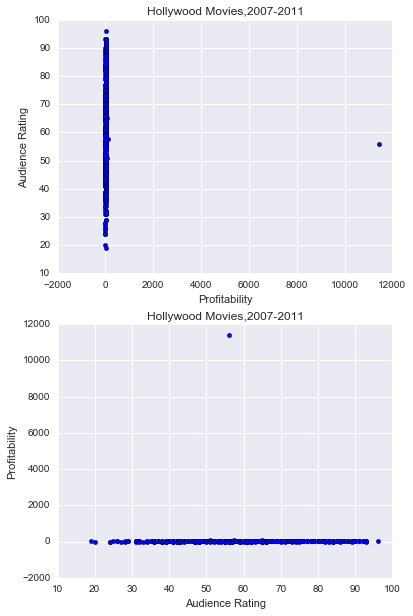

In [36]:
fig = plt.figure(figsize = (6,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.scatter(hollywood_movies["Profitability"],hollywood_movies["Audience Rating"])
ax1.set(xlabel="Profitability",ylabel="Audience Rating",title = "Hollywood Movies,2007-2011")
ax2.scatter(hollywood_movies["Audience Rating"],hollywood_movies["Profitability"])
ax2.set(xlabel="Audience Rating",ylabel="Profitability",title = "Hollywood Movies,2007-2011")
plt.show()


In [37]:
# clearly there is one outlier in the data that is skewing the entire plot
# trying to find it

hollywood_movies[hollywood_movies["Profitability"] == hollywood_movies["Profitability"].max()]


,Year,Film,Lead Studio,Critic Rating,Audience Rating,Story,Genre,Opening Weekend Theaters,Opening Weekend per Cinema,Domestic Gross,Foreign Gross,Worldwide Gross,Budget,Profitability,Opening Weekend Revenue,Oscar
282,2009,Paranormal Activity,Independent,82,56,Monster Force,Horror,760,25813,107.92,63.41,171.3,0.015,11420,19.6,NaN


In [38]:
# removing paranormal activity

normal_movies = hollywood_movies[hollywood_movies["Profitability"] < 10000]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000022631EB8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000021930358>]], dtype=object)

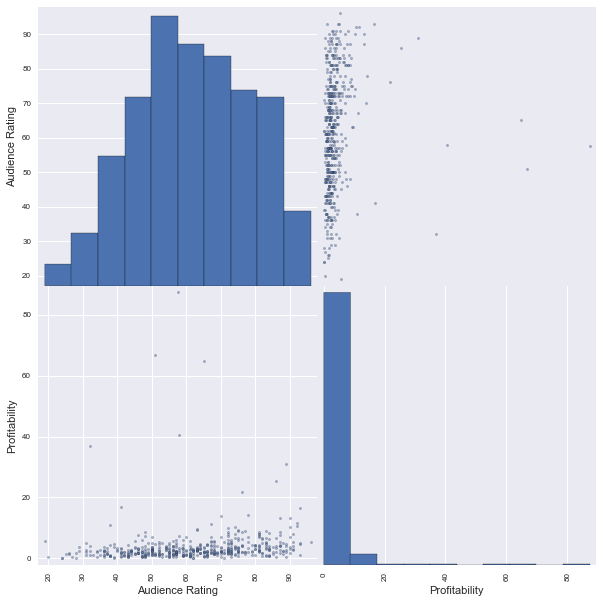

In [39]:
# Now we can generate a scatter matric between Audience Rating and Profitability

from pandas.tools.plotting import scatter_matrix

scatter_matrix(normal_movies[["Audience Rating","Profitability"]],figsize = (10,10))

### How different are the Audience and Critic Ratings?

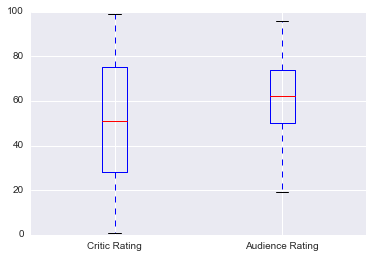

In [41]:
hollywood_movies[["Critic Rating","Audience Rating"]].plot(kind='box')

Visualizing how this distribution changed year to year.

In [45]:
normal_movies.sort("Year",inplace=True)

C:\Users\Keerthana\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
C:\Users\Keerthana\Anaconda2\lib\site-packages\pandas\core\frame.py:3167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  inplace=inplace, kind=kind, na_position=na_position)


In [46]:
normal_movies.head()

,Year,Film,Lead Studio,Critic Rating,Audience Rating,Story,Genre,Opening Weekend Theaters,Opening Weekend per Cinema,Domestic Gross,Foreign Gross,Worldwide Gross,Budget,Profitability,Opening Weekend Revenue,Oscar
516,2007,Grindhouse,The Weinstein Company,82,86,pursuit,Action,2624,4419,25.04,0.38,25.42,53,0.4797,11.6,NaN
455,2007,Enchanted,Disney,93,80,Love,Comedy,3730,9233,127.81,212.68,340.49,85,4.0057,34.4,NaN
456,2007,Sicko,The Weinstein Company,93,87,quest,Documentary,702,5128,24.54,11.23,35.77,9,3.9742,3.6,NaN
457,2007,Halloween,The Weinstein Company,26,64,Pursuit,Horror,3472,7592,58.27,20.20,78.47,20,3.9235,26.4,NaN
458,2007,I Am Legend,Warner Bros.,69,69,Quest,Thriller,3606,21411,256.39,327.76,584.16,150,3.8944,77.2,NaN


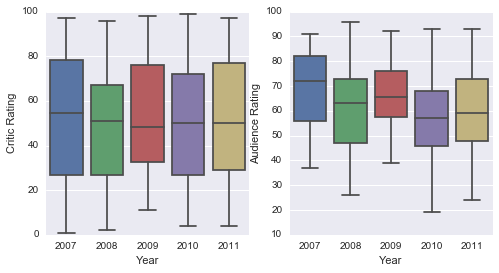

In [55]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.boxplot(x="Year",y="Critic Rating",data=normal_movies,ax=ax1)
sns.boxplot(x="Year",y="Audience Rating",data=normal_movies,ax=ax2)
plt.show()

In [69]:
def is_profitable(row):
    if row["Profitability"] <= 1:
        return False
    return True

# we want to apply the function on each ROW(axis=1)
normal_movies.loc[:,"Profitable"] = normal_movies.apply(is_profitable,axis=1)

C:\Users\Keerthana\Anaconda2\lib\site-packages\pandas\core\indexing.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Keerthana\Anaconda2\lib\site-packages\pandas\core\indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [70]:
normal_movies.head()

,Year,Film,Lead Studio,Critic Rating,Audience Rating,Story,Genre,Opening Weekend Theaters,Opening Weekend per Cinema,Domestic Gross,Foreign Gross,Worldwide Gross,Budget,Profitability,Opening Weekend Revenue,Oscar,Profitable
516,2007,Grindhouse,The Weinstein Company,82,86,pursuit,Action,2624,4419,25.04,0.38,25.42,53,0.4797,11.6,NaN,False
455,2007,Enchanted,Disney,93,80,Love,Comedy,3730,9233,127.81,212.68,340.49,85,4.0057,34.4,NaN,True
456,2007,Sicko,The Weinstein Company,93,87,quest,Documentary,702,5128,24.54,11.23,35.77,9,3.9742,3.6,NaN,True
457,2007,Halloween,The Weinstein Company,26,64,Pursuit,Horror,3472,7592,58.27,20.20,78.47,20,3.9235,26.4,NaN,True
458,2007,I Am Legend,Warner Bros.,69,69,Quest,Thriller,3606,21411,256.39,327.76,584.16,150,3.8944,77.2,NaN,True


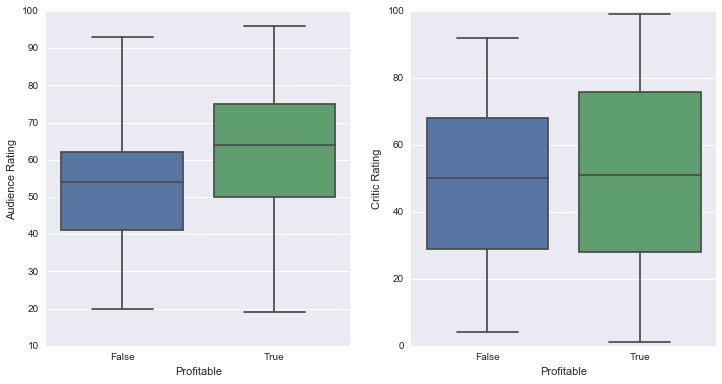

In [73]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.boxplot(x="Profitable",y="Audience Rating",data=normal_movies,ax=ax1)
sns.boxplot(x="Profitable",y="Critic Rating",data=normal_movies,ax=ax2)
sns.plt.show()